# Prøve - Databehandling


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['ggplot'])
sns.set_palette("deep", 10)
sns.set(rc={'figure.figsize':(10, 8)})

## Dow Jones

In [36]:
dj = sns.load_dataset('dowjones')
dj.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


### Oppgave 0

Lag et plot over prisutviklingen til Dow Jones indeksen.

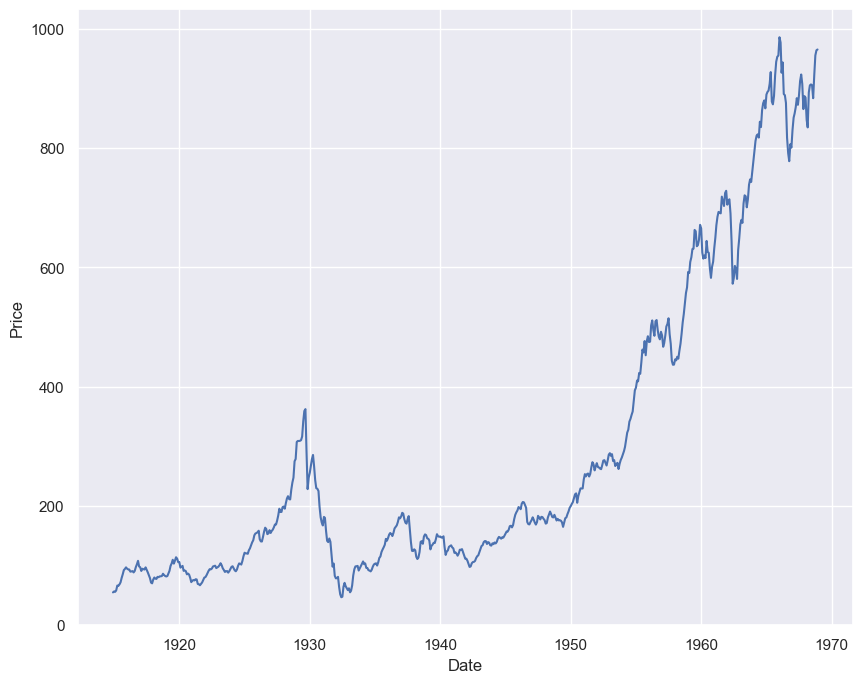

In [37]:
sns.lineplot(x='Date', y='Price', data=dj)
plt.show()

### Oppgave 1

Presenter dagen med lavest verdi og dagen med høyest verdi. Hva var prisen de dagene?


Lavest verdi:

In [38]:
dj.sort_values(by='Price').head(1)

,Date,Price
210,1932-06-01,46.85


Høyest verdi

In [39]:
dj.sort_values(by='Price').tail(1)

,Date,Price
613,1966-01-01,985.93


## F1 drivers

In [42]:
f1 = pd.read_csv('F1DriversDataset.csv', sep=',')
f1.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


### Oppgave 0

Presenter antallet som har blitt 'Champion' og antallet som ikke har blitt det.

In [43]:
f1.groupby('Champion')['Driver'].count()

Champion
False    834
True      34
Name: Driver, dtype: int64

### Oppgave 1

Hvem har flest raskeste runder og hvor mange?

In [44]:
f1.sort_values(by=['Fastest_Laps'], ascending=False)[['Driver', 'Fastest_Laps']].head(1)

,Driver,Fastest_Laps
710,Michael Schumacher,77.0


### Oppgave 2

Presenterer de fem som har vunnet flest ganger og hvor mange ganger de har vunnet

In [45]:
f1.sort_values(by=['Race_Wins'],ascending=False)[['Driver', 'Race_Wins']].head(5)

,Driver,Race_Wins
338,Lewis Hamilton,103.0
710,Michael Schumacher,91.0
812,Sebastian Vettel,53.0
628,Alain Prost,51.0
720,Ayrton Senna,41.0


### Oppgave 3
Presenterer de ti med høyest podiumsrate. Vis 'Driver', 'Podium_Rate', 'Decade' og 'Nationality'.

In [46]:
f1.sort_values(by=['Podium_Rate'],ascending=False)[['Driver', 'Podium_Rate', 'Decade', 'Nationality']].head(10)

,Driver,Podium_Rate,Decade,Nationality
722,Dorino Serafini,1.000000,1950,Italy
236,Luigi Fagioli,0.857143,1950,Italy
238,Juan Manuel Fangio,0.673077,1950,Argentina
338,Lewis Hamilton,0.614148,2010,United Kingdom
239,Nino Farina,0.588235,1950,Italy
310,José Froilán González,0.576923,1950,Argentina
628,Alain Prost,0.524752,1990,France
35,Alberto Ascari,0.515152,1950,Italy
710,Michael Schumacher,0.503247,2000,Germany
340,Sam Hanks,0.500000,1950,United States


### Oppgave 4

Lag et histogram (histplot) over 'Years_Active'. Sett binwidth=2

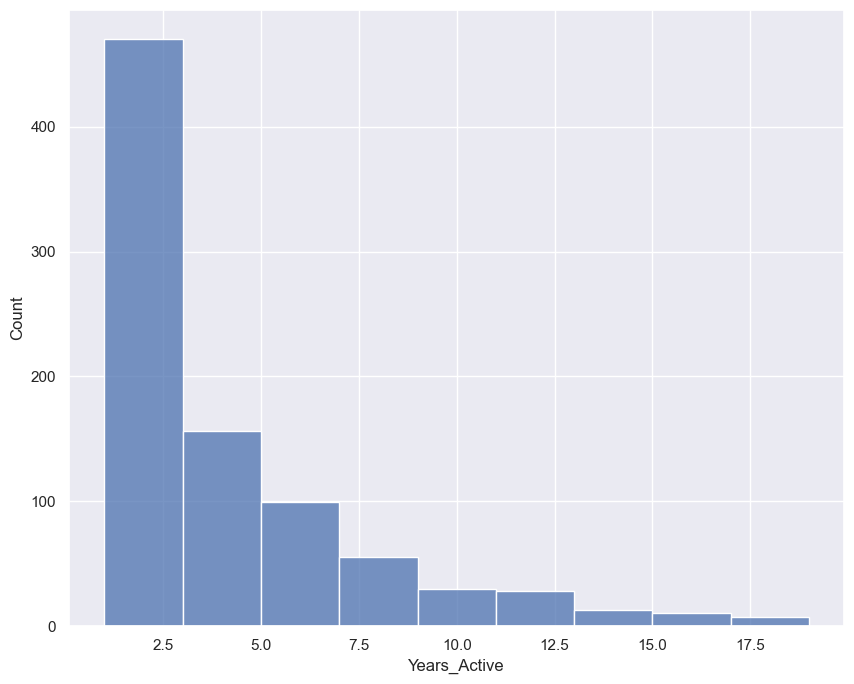

In [47]:
sns.histplot(x='Years_Active', data=f1, binwidth=2)
plt.show()

### Oppgave 5

Lag et passende diagram som viser de 20 som har vunnet "serien" (er Champion) og antall seiere.

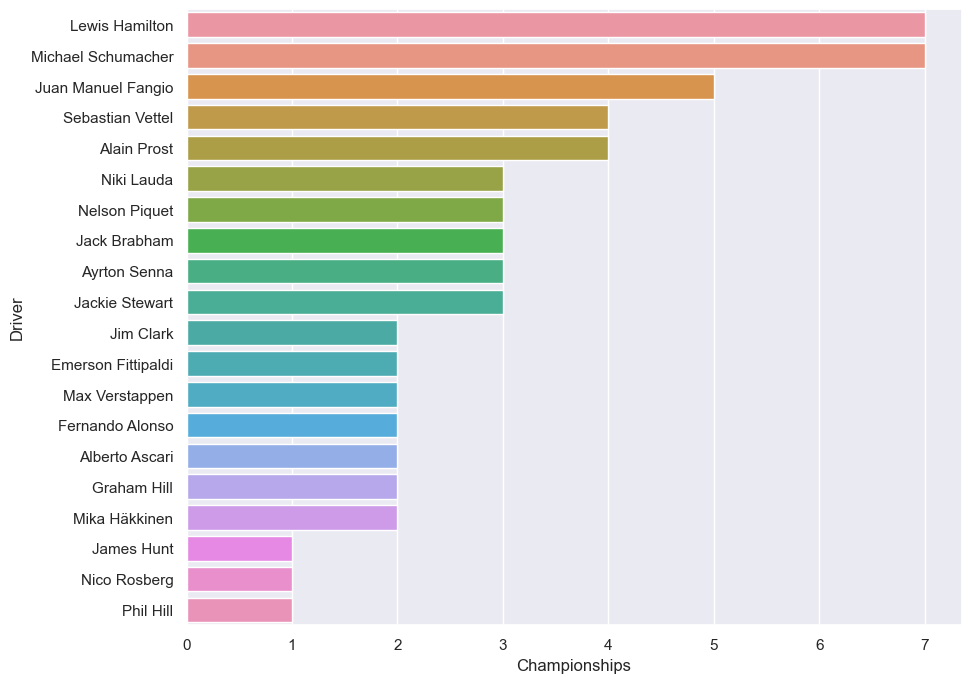

In [48]:
f1_champs = f1.sort_values(by='Championships',ascending=False).head(20)

sns.barplot(y='Driver', x='Championships', data=f1_champs, orient='h')
plt.show()

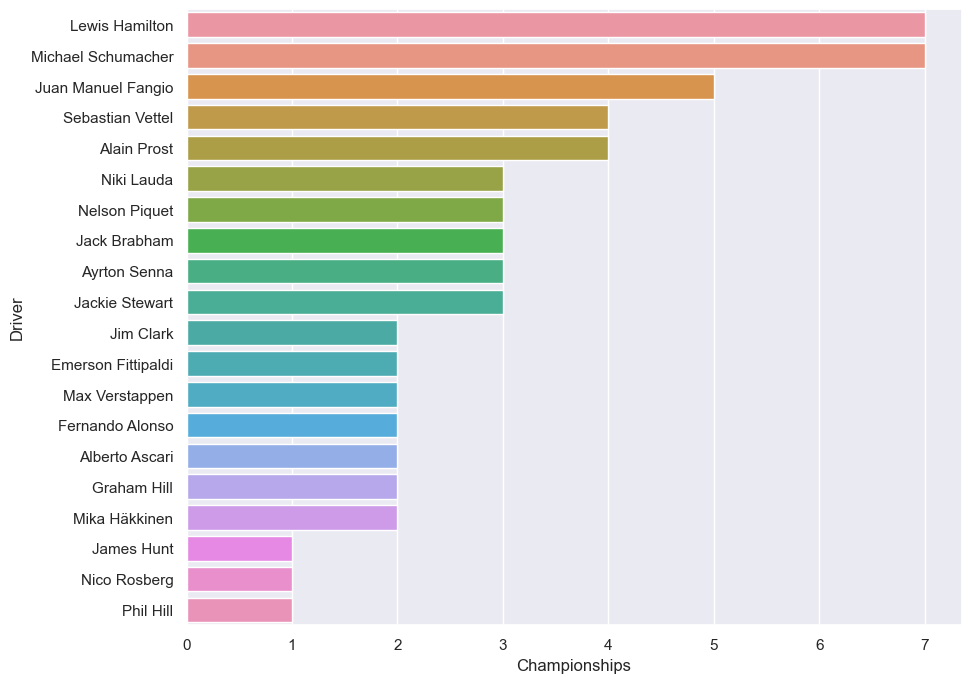

In [50]:
sns.barplot(y='Driver', x='Championships', data=f1_champs)
plt.show()

### Oppgave 6

Presenter total antall førsteplasser til de 20 mestvinnende nasjonalitetene

In [33]:
f1.groupby('Nationality')['Race_Wins'].sum().sort_values(ascending=False).head(20)

Nationality
United Kingdom    309.0
Germany           176.0
Brazil            101.0
France             81.0
Finland            57.0
Australia          43.0
Italy              43.0
Austria            41.0
Argentina          38.0
Netherlands        36.0
Spain              33.0
United States      33.0
Canada             17.0
New Zealand        12.0
Sweden             12.0
Belgium            11.0
South Africa       10.0
Colombia            7.0
Switzerland         7.0
Mexico              6.0
Name: Race_Wins, dtype: float64

### Oppgave 7

Av de som har blitt 'Champion', hva er gjennomsnitt antall ganger de har vunnet?

In [16]:
f1_champs = f1[f1['Champion']==True]
f1_champs['Championships'].mean()

2.1470588235294117

### Oppgave 8

Vis alle kjørere som har over 13 seiere oppdelt etter nationalitet.

In [17]:
f1[f1['Race_Wins'] > 13].sort_values(by='Race_Wins', ascending=False).groupby(['Nationality', 'Driver'])['Race_Wins'].sum()

Nationality     Driver            
Argentina       Juan Manuel Fangio     24.0
Australia       Jack Brabham           14.0
Austria         Niki Lauda             25.0
Brazil          Ayrton Senna           41.0
                Emerson Fittipaldi     14.0
                Nelson Piquet          23.0
Finland         Kimi Räikkönen         21.0
                Mika Häkkinen          20.0
France          Alain Prost            51.0
Germany         Michael Schumacher     91.0
                Nico Rosberg           23.0
                Sebastian Vettel       53.0
Netherlands     Max Verstappen         36.0
Spain           Fernando Alonso        32.0
United Kingdom  Damon Hill             22.0
                Graham Hill            14.0
                Jackie Stewart         27.0
                Jenson Button          15.0
                Jim Clark              25.0
                Lewis Hamilton        103.0
                Nigel Mansell          31.0
                Stirling Moss          16

### Oppgave 9

Hvor mange ulike nationaliteter har blitt representert?

In [18]:
f1['Nationality'].nunique()

47

### Ekstraoppgave

Hvem kan ha blitt 'Champion' i 1983?  

In [19]:
f1_champs[f1_champs['Championship Years'].str.contains('1983')][['Driver', 'Championship Years']]

,Driver,Championship Years
612,Nelson Piquet,"[1981, 1983, 1987]"


In [20]:
f1_champs.loc[f1_champs['Championship Years'].str.contains('1983'), ['Driver', 'Championship Years']]

,Driver,Championship Years
612,Nelson Piquet,"[1981, 1983, 1987]"
